# Tutorial 04, Intro to machine learning/pattern classification

## Machine learning, or pattern recognition, refers to a large set of tools that are used in many areas of science in any case where you are trying to use multiple measured variables to determine if information is encoded about different levels of an experimental manipulation. 
* To the extent that there is information in a pattern of measured responses, then the pattern recognition algorithm will be able to successfully assign different examplars into their correct classes.
* If there is no information, then it the pattern recognition algorithm will randomly guess and classifation accuracy will be at chance. 
* Note that the 'pattern' part of 'pattern recognition' refers to the fact that we're not just going to use a single variable to predict our outcome measure - we're going  to use the information encoded by a series of variables to make predictions (i.e. a 'multivariate' analysis).
* The multivariate nature of the method is a major advantage as you might infer a null relationship based on univariate methods when in fact there is a very robust relationship that can be revealed by exploiting information encoded in a pattern of measurements. 

<div class="alert alert-info">
Cross-validation: To assess the generalizability of a pattern classification algorithm. Cross-validation simply refers to the notion that you train your pattern recognition algorithm (henceforth I'll call this a 'classifer') using one set of data, and then you validate, or 'test', the performance of the classifier using a novel set of data that was not part of the training set. The main purpose of cross-validation is to assess the generalizability of your classifier and its ability to correctly categorize novel inputs.

This sounds simple but can be tricky...suppose you did an experiment that had 500 trials of stimulus type A and 500 trials of stimulus type B and you measured the response on each trial in 100 neurons. 

Then, to figure out how well the neural data respond systematically to changes in stimulus parameters, you  fit a multivariate regression analysis to see how much variability in the stimulus is accounted for by changes in neural activity (i.e. you compute something akin to a R^2 value to asses goodness of fit). Suppose you run this analysis on all 1,000 trials and you get your R^2 value and its nice and high - like .75 or so. You might be really happy with this, however, since you fit all of the data in your model, your estimate of how good the model fits the data is almost certainly overestimating how good the model is at accounting for the relationship between the two factors because your dependent variables  (your measured neural responses) are corrupted by noise, and this noise is idiosyncratic in the sense that if you were to perform the experiment again, you'd get 1000 different measurements that were similar to the first 1000, but corrupted by different noise. 

As a result, when you fit your model to the data, the resulting coeffecients will reflect the true 'signal' in the data AND the idiosyncratic noise that was measured along with the signal. In effect, your model learns the relationship between the independent variable and the (signal + noise). This occurs because your model has no a priori means of separating out signal and noise - it just gets a measure of neural responses that were evoked by each stimulus, and the model is just relating those measurements to the independent variables. This is referred to as 'overfitting', and is a exacerbated by small data sets (where the signal is not likely to emerge from the noise due to the small sample size) and when you have a model that has lots of free parameters (more free parameters means that the model can more flexibly account for random variations in the data...i.e. noise).  
So - what to do? Instead of fitting the model to all the data and assessing the goodness of fit, you could use cross-validation to estimate **prediction accuracy**. In our example above, you could train your classifer using 400/500 of the trials associated with each stimulus set (so 800 trials total), and then 'test' the classifer's performance at guessing the correct stimulus class using the remaining 200 trials (100 associated with each stimulus). 

Then you could permute this train/test procedure several times, each time holding-out a different set of 800 trials to train the classifer and 200 trials to test the performance of the classifier. Here is the cool part: if your model is just learning the idiosyncratic noise in the data, then you might have a reasonable looking R^2 value based on your training data (i.e. the model fits the training data ok), but your ability to classify novel examplars from the test set will be at chance becuase your model just learned the random noise in the training set and there was no consistent 'signal' that could actually discriminate between conditions. 

So, the use of cross-validation can protect against overly optimistic assessments of model fit due to 'overfitting', and also enables you to assess the generalizability of the model to classify novel exemplars. The degree to which a classifer generalizes to correctly predict novel stimuli is really  then a measure of how much real signal - or information - there is in your data about the different examplars that you're trying to classify.
</div>

## Start with imports

In [10]:
import numpy as np
from scipy import stats  # has t-tests and other stats stuff...
from scipy.linalg import eigh
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline


# use seaborn plotting defaults
import seaborn as sns; sns.set()

# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## First lets set up some code to generate simulated data
* We'll set up a function to generate data from two variables that is correlated to a specified degree
* Can see why multivariate analyses are so powerful when comparing a N-D representation to a univariate representation
* In this example, we'll have two variables (e.g. neurons), and two experimental conditions
* We want to see if the pattern of responses across the two variables systematically varies across conditions
* [scipy cookbook for generating correlated samples](https://scipy-cookbook.readthedocs.io/items/CorrelatedRandomSamples.html)

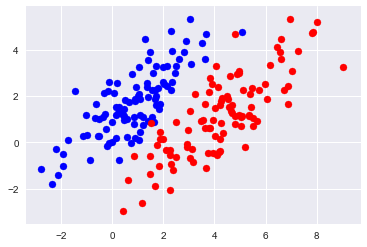

In [11]:
# number of data points in our simulated data
N = 100 

# number of variables, in this case lets start with 2 because that makes it easy to 
# visualize
V = 2

# means of each variable in each condition
mean_of_data0 = np.array([1,2])
mean_of_data1 = np.array([4,1])

# generate some random data vectors drawn from normal
data0 = np.random.randn(N,V) 
data1 = np.random.randn(N,V) 

# set up a covariance matrix - main diag is the variance of each and off-diags are the cov
# first do it for the responses in condition 1
cv_mat0 = np.array([
    [2.6, 2.2],
    [2.1, 2.5]
])

# for our second data set...
cv_mat1 = np.array([
    [3, 2.6],
    [2.4, 3]
])

# impose the covariance structure on the data

# first compute the eigenvalues and eigenvectors
evals0, evecs0 = eigh(cv_mat0)
evals1, evecs1 = eigh(cv_mat1)

# Construct c, so c*c^T = cv_mat.
c0 = np.dot(evecs0, np.diag(np.sqrt(evals0)))
c1 = np.dot(evecs1, np.diag(np.sqrt(evals1)))

# convert the data using by multiplying data by c
# to be consistent with previous tutorials, we want the data running down columns...so do the double .T
cdata0 = np.dot(c0, data0.T).T + np.vstack((np.ones(N,)*mean_of_data0[0], np.ones(N,)*mean_of_data0[1])).T

cdata1 = np.dot(c1, data1.T).T + np.vstack((np.ones(N,)*mean_of_data1[0], np.ones(N,)*mean_of_data1[1])).T  

# plot the data...
plt.scatter(cdata0[:,0], cdata0[:,1], color='b')
plt.scatter(cdata1[:,0], cdata1[:,1], color='r')
plt.show()

In [46]:
np.mean(data0, axis=0)

array([ 1.00874786,  1.88406453])

## now lets add another data set...

## SVM - instead of fitting a model to the data from each condition, find a boundary that maximizes the margin

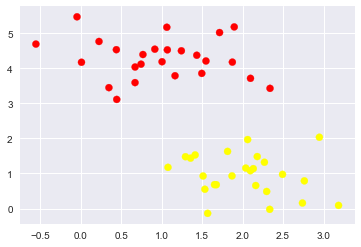

In [12]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

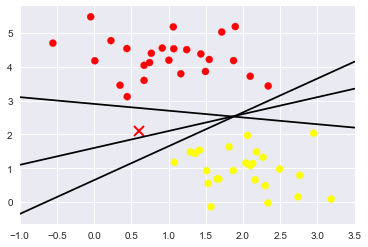

In [13]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

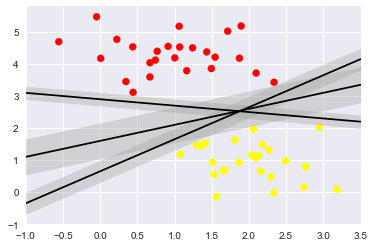

In [14]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [15]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

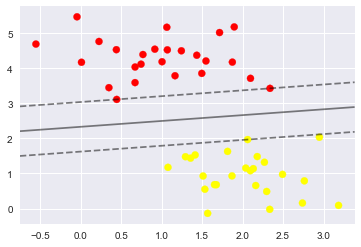

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [19]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

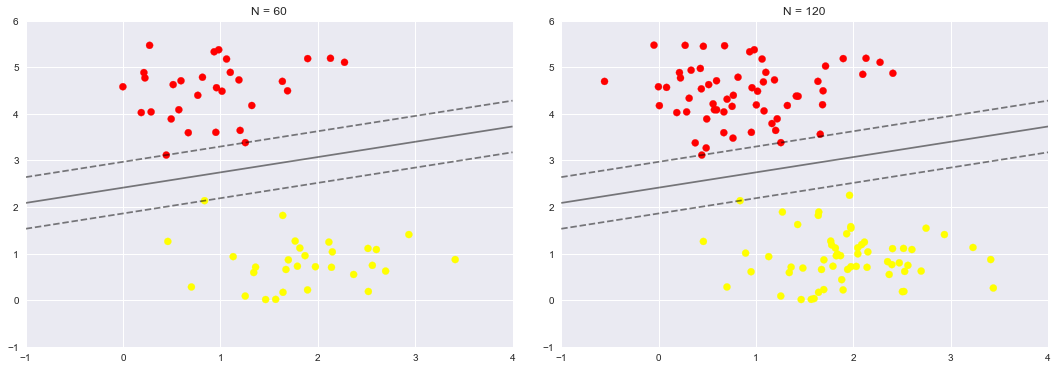

In [20]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [24]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

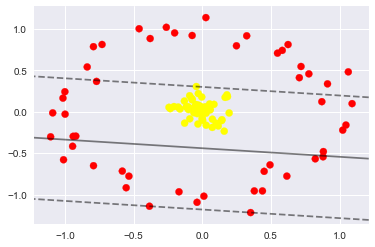

In [21]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [22]:
r = np.exp(-(X ** 2).sum(1))


In [26]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

In [27]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

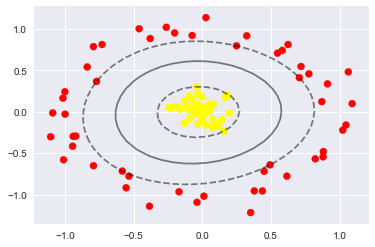

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');